In [25]:
!pip install scanpy

In [26]:
import scanpy as sc

In [27]:
adata = sc.read_10x_mtx(path='All_cell_matrix',cache=True)
adata

/Users/zhiyongw/venv/Test/lib/python3.10/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 166533 × 24850
    var: 'gene_ids', 'feature_types'

In [28]:
import pandas as pd

In [29]:
meta_table = pd.read_csv('All_cell_annotations.tsv', sep='\t')
meta_table.set_index(meta_table.columns[0],inplace=True)
meta_table.index.name = ''
meta_table

,batch,n_counts,n_genes,percent_mito,patient,tissue,cluster,cluster_color,TCR_BCR,UMAP_x,UMAP_y
,,,,,,,,,,,
GC10B:AAACCTGAGACAGACC,GC10B,3558.0,1592,0.043845,GC10,Blood,T cells & NK cells,#ffbb78,others,-13.374247,6.490090
GC10B:AAACCTGAGAGCTTCT,GC10B,552.0,403,0.007246,GC10,Blood,Myeloid cells,#17becf,others,-2.030192,9.041772
GC10B:AAACCTGAGCCGATTT,GC10B,3366.0,1501,0.064765,GC10,Blood,T cells & NK cells,#ffbb78,others,-13.923049,5.872977
GC10B:AAACCTGAGCTAGTTC,GC10B,4495.0,1280,0.053393,GC10,Blood,T cells & NK cells,#ffbb78,TCR_detected,1.637775,4.521393
GC10B:AAACCTGAGGGTCGAT,GC10B,6313.0,1905,0.044036,GC10,Blood,Myeloid cells,#17becf,others,-4.094482,11.872542
...,...,...,...,...,...,...,...,...,...,...,...
GC09T:TTTGTCAGTAATTGGA,GC09T,3268.0,1332,0.055386,GC09,Tumor,T cells & NK cells,#ffbb78,TCR_detected,-9.077943,-1.229352
GC09T:TTTGTCAGTGACAAAT,GC09T,12476.0,2124,0.034466,GC09,Tumor,B cells(Plasma cells),#ff7f0e,BCR_detected,11.663207,1.158398
GC09T:TTTGTCAGTGTTGAGG,GC09T,5555.0,1898,0.067327,GC09,Tumor,B cells,#1f77b4,others,7.225957,6.477765


In [30]:
adata.obs = pd.merge(adata.obs,meta_table, left_index = True, right_index=True)
adata.obs

,batch,n_counts,n_genes,percent_mito,patient,tissue,cluster,cluster_color,TCR_BCR,UMAP_x,UMAP_y
GC10B:AAACCTGAGACAGACC,GC10B,3558.0,1592,0.043845,GC10,Blood,T cells & NK cells,#ffbb78,others,-13.374247,6.490090
GC10B:AAACCTGAGAGCTTCT,GC10B,552.0,403,0.007246,GC10,Blood,Myeloid cells,#17becf,others,-2.030192,9.041772
GC10B:AAACCTGAGCCGATTT,GC10B,3366.0,1501,0.064765,GC10,Blood,T cells & NK cells,#ffbb78,others,-13.923049,5.872977
GC10B:AAACCTGAGCTAGTTC,GC10B,4495.0,1280,0.053393,GC10,Blood,T cells & NK cells,#ffbb78,TCR_detected,1.637775,4.521393
GC10B:AAACCTGAGGGTCGAT,GC10B,6313.0,1905,0.044036,GC10,Blood,Myeloid cells,#17becf,others,-4.094482,11.872542
...,...,...,...,...,...,...,...,...,...,...,...
GC09T:TTTGTCAGTAATTGGA,GC09T,3268.0,1332,0.055386,GC09,Tumor,T cells & NK cells,#ffbb78,TCR_detected,-9.077943,-1.229352
GC09T:TTTGTCAGTGACAAAT,GC09T,12476.0,2124,0.034466,GC09,Tumor,B cells(Plasma cells),#ff7f0e,BCR_detected,11.663207,1.158398
GC09T:TTTGTCAGTGTTGAGG,GC09T,5555.0,1898,0.067327,GC09,Tumor,B cells,#1f77b4,others,7.225957,6.477765
GC09T:TTTGTCATCAGCTTAG,GC09T,2470.0,1059,0.031984,GC09,Tumor,B cells,#1f77b4,others,5.668129,8.182839


In [31]:
adata = adata[ adata.obs['tissue'] == 'Tumor' ]

In [32]:
adata.X.shape

(80446, 24850)

In [33]:
adata.obs

,batch,n_counts,n_genes,percent_mito,patient,tissue,cluster,cluster_color,TCR_BCR,UMAP_x,UMAP_y
GC10T-Tcell:AAACCTGAGAACAATC,GC10T-Tcell,7072.0,2469,0.037755,GC10,Tumor,T cells & NK cells,#ffbb78,TCR_detected,-4.366646,-3.124263
GC10T-Tcell:AAACCTGAGGCCCGTT,GC10T-Tcell,3872.0,1453,0.027118,GC10,Tumor,T cells & NK cells,#ffbb78,TCR_detected,-1.078918,1.344102
GC10T-Tcell:AAACCTGAGTTCGATC,GC10T-Tcell,3508.0,1359,0.033352,GC10,Tumor,T cells & NK cells,#ffbb78,TCR_detected,-0.120173,-0.295194
GC10T-Tcell:AAACCTGCAGTGAGTG,GC10T-Tcell,4067.0,1762,0.028768,GC10,Tumor,T cells & NK cells,#ffbb78,TCR_detected,-6.583777,-3.370298
GC10T-Tcell:AAACCTGGTAAAGGAG,GC10T-Tcell,17373.0,3764,0.054395,GC10,Tumor,Smooth muscle cells,#aec7e8,others,8.923708,14.389697
...,...,...,...,...,...,...,...,...,...,...,...
GC09T:TTTGTCAGTAATTGGA,GC09T,3268.0,1332,0.055386,GC09,Tumor,T cells & NK cells,#ffbb78,TCR_detected,-9.077943,-1.229352
GC09T:TTTGTCAGTGACAAAT,GC09T,12476.0,2124,0.034466,GC09,Tumor,B cells(Plasma cells),#ff7f0e,BCR_detected,11.663207,1.158398
GC09T:TTTGTCAGTGTTGAGG,GC09T,5555.0,1898,0.067327,GC09,Tumor,B cells,#1f77b4,others,7.225957,6.477765
GC09T:TTTGTCATCAGCTTAG,GC09T,2470.0,1059,0.031984,GC09,Tumor,B cells,#1f77b4,others,5.668129,8.182839


In [34]:
adata.obs['cluster'].unique()

array(['T cells & NK cells', 'Smooth muscle cells', 'Fibroblasts',
       'Endothelial cells', 'Epithelial cells', 'Myeloid cells',
       'B cells', 'B cells(Plasma cells)', 'Mast cells', 'Erythrocytes',
       'Endocrine cells'], dtype=object)

# Doublet removal - optional but preferred

In [35]:
#!pip install scvi-tools

In [36]:
#import scvi

In [37]:
#sc.pp.filter_genes(adata, min_cells = 10)
#adata

In [38]:
#sc.pp.highly_variable_genes(adata, n_top_genes = 2000, subset = True, flavor = 'seurat')

In [39]:
#scvi.model.SCVI.setup_anndata(adata)
#vae = scvi.model.SCVI(adata)
#vae.train()

In [40]:
#solo = scvi.external.SOLO.from_scvi_model(vae)
#solo.train()

In [41]:
#df = solo.predict()
#df['prediction'] = solo.predict(soft = False)

#df.index = df.index.map(lambda x: x[:-2])

#df

In [42]:
#df.groupby('prediction').count()

In [43]:
#df['dif'] = df.doublet - df.singlet
#df

In [44]:
#import seaborn as sns

In [45]:
#sns.displot(df[df.prediction == 'doublet'], x = 'dif')

In [46]:
#doublets = df[(df.prediction == 'doublet') & (df.dif > 1)]
#doublets

In [47]:
#adata = sc.read_csv('raw_counts/GSM5226574_C51ctr_raw_counts.csv').T

In [48]:
#adata.obs['doublet'] = adata.obs.index.isin(doublets.index)

In [49]:
#adata.obs

In [50]:
#adata = adata[~adata.obs.doublet]

In [51]:
#adata

# Preprocessing

In [52]:
adata.var['mt'] = adata.var.index.str.startswith('MT-')

/var/folders/wx/55cpzt110xz91y6p9dgbsw2c0000gp/T/ipykernel_60483/310233584.py:1: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['mt'] = adata.var.index.str.startswith('MT-')


In [53]:
adata.var['mt'].describe()

count     24850
unique        2
top       False
freq      24837
Name: mt, dtype: object

In [54]:
adata = adata[:, adata.var['mt'] == False]

In [55]:
adata.X.shape

(80446, 24837)

In [56]:
import pandas as pd

In [57]:
ribo_url = "http://software.broadinstitute.org/gsea/msigdb/download_geneset.jsp?geneSetName=KEGG_RIBOSOME&fileType=txt"

In [58]:
ribo_genes = pd.read_table(ribo_url, skiprows=2, header = None)
ribo_genes

,0
0,FAU
1,MRPL13
2,RPL10
3,RPL10A
4,RPL10L
...,...
83,RPS9
84,RPSA
85,RSL24D1
86,RSL24D1P11


In [59]:
adata.var['ribo'] = adata.var_names.isin(ribo_genes[0].values)

/var/folders/wx/55cpzt110xz91y6p9dgbsw2c0000gp/T/ipykernel_60483/640738055.py:1: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['ribo'] = adata.var_names.isin(ribo_genes[0].values)


In [60]:
adata.var['ribo'].describe()

count     24837
unique        2
top       False
freq      24750
Name: ribo, dtype: object

In [61]:
adata = adata[:, adata.var['ribo'] == False]

In [62]:
adata.X.shape

(80446, 24750)

In [63]:
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt', 'ribo'], percent_top=None, log1p=False, inplace=True)

/Users/zhiyongw/venv/Test/lib/python3.10/site-packages/scanpy/preprocessing/_qc.py:135: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[obs_metrics.columns] = obs_metrics


In [64]:
adata.obs

,batch,n_counts,n_genes,percent_mito,patient,tissue,cluster,cluster_color,TCR_BCR,UMAP_x,UMAP_y,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
GC10T-Tcell:AAACCTGAGAACAATC,GC10T-Tcell,7072.0,2469,0.037755,GC10,Tumor,T cells & NK cells,#ffbb78,TCR_detected,-4.366646,-3.124263,2373,2146.598877,0.0,0.0,0.0,0.0
GC10T-Tcell:AAACCTGAGGCCCGTT,GC10T-Tcell,3872.0,1453,0.027118,GC10,Tumor,T cells & NK cells,#ffbb78,TCR_detected,-1.078918,1.344102,1360,1703.851929,0.0,0.0,0.0,0.0
GC10T-Tcell:AAACCTGAGTTCGATC,GC10T-Tcell,3508.0,1359,0.033352,GC10,Tumor,T cells & NK cells,#ffbb78,TCR_detected,-0.120173,-0.295194,1268,1663.743286,0.0,0.0,0.0,0.0
GC10T-Tcell:AAACCTGCAGTGAGTG,GC10T-Tcell,4067.0,1762,0.028768,GC10,Tumor,T cells & NK cells,#ffbb78,TCR_detected,-6.583777,-3.370298,1671,2041.076294,0.0,0.0,0.0,0.0
GC10T-Tcell:AAACCTGGTAAAGGAG,GC10T-Tcell,17373.0,3764,0.054395,GC10,Tumor,Smooth muscle cells,#aec7e8,others,8.923708,14.389697,3669,2240.429199,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GC09T:TTTGTCAGTAATTGGA,GC09T,3268.0,1332,0.055386,GC09,Tumor,T cells & NK cells,#ffbb78,TCR_detected,-9.077943,-1.229352,1236,1704.586182,0.0,0.0,0.0,0.0
GC09T:TTTGTCAGTGACAAAT,GC09T,12476.0,2124,0.034466,GC09,Tumor,B cells(Plasma cells),#ff7f0e,BCR_detected,11.663207,1.158398,2028,1793.149048,0.0,0.0,0.0,0.0
GC09T:TTTGTCAGTGTTGAGG,GC09T,5555.0,1898,0.067327,GC09,Tumor,B cells,#1f77b4,others,7.225957,6.477765,1805,1793.885742,0.0,0.0,0.0,0.0
GC09T:TTTGTCATCAGCTTAG,GC09T,2470.0,1059,0.031984,GC09,Tumor,B cells,#1f77b4,others,5.668129,8.182839,967,1513.628418,0.0,0.0,0.0,0.0


In [65]:
adata.var.sort_values('n_cells_by_counts')

,gene_ids,feature_types,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
AC022081.1,ENSG00000256513,Gene Expression,False,False,0,0.000000,100.000000,0.00000
AC104389.5,ENSG00000284931,Gene Expression,False,False,0,0.000000,100.000000,0.00000
CLEC1B,ENSG00000165682,Gene Expression,False,False,0,0.000000,100.000000,0.00000
LINC01785,ENSG00000268038,Gene Expression,False,False,0,0.000000,100.000000,0.00000
S100G,ENSG00000169906,Gene Expression,False,False,0,0.000000,100.000000,0.00000
...,...,...,...,...,...,...,...,...
PTMA,ENSG00000187514,Gene Expression,False,False,78036,3.392477,2.995798,272911.21875
ACTB,ENSG00000075624,Gene Expression,False,False,78118,4.250394,2.893867,341927.21875
EEF1A1,ENSG00000156508,Gene Expression,False,False,78469,5.138030,2.457549,413333.96875
B2M,ENSG00000166710,Gene Expression,False,False,78513,5.258129,2.402854,422995.46875


In [66]:
sc.pp.filter_genes(adata, min_cells=3)

In [67]:
adata.obs.sort_values('n_genes_by_counts')

,batch,n_counts,n_genes,percent_mito,patient,tissue,cluster,cluster_color,TCR_BCR,UMAP_x,UMAP_y,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
GC02T:TACTCATGTTAAAGAC,GC02T,1936.0,303,0.005682,GC02,Tumor,B cells(Plasma cells),#ff7f0e,others,9.865548,2.384873,233,745.830261,0.0,0.0,0.0,0.0
GC06T:TCTTCGGGTCATATGC,GC06T,861.0,305,0.155633,GC06,Tumor,B cells(Plasma cells),#ff7f0e,others,10.273343,1.813409,234,753.789429,0.0,0.0,0.0,0.0
GC04T:CTGATCCCAGGTGGAT,GC04T,1697.0,302,0.014732,GC04,Tumor,Epithelial cells,#aa40fc,others,10.427670,-5.396895,235,818.537842,0.0,0.0,0.0,0.0
GC01T:TGCCAAATCTCGAGTA,GC01T,1765.0,313,0.016431,GC01,Tumor,B cells,#1f77b4,others,9.901426,5.710325,237,722.450195,0.0,0.0,0.0,0.0
GC04T:CACCAGGAGTGCCAGA,GC04T,1511.0,318,0.037062,GC04,Tumor,Epithelial cells,#aa40fc,others,10.930943,-5.306543,240,783.080872,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GC07T:CTTCTCTGTATGCTTG,GC07T,76190.0,8285,0.074734,GC07,Tumor,Epithelial cells,#aa40fc,others,7.118983,-7.456750,8187,2667.840576,0.0,0.0,0.0,0.0
GC10T-Tcell:TATGCCCCACGCATCG,GC10T-Tcell,91070.0,8424,0.098781,GC10,Tumor,Epithelial cells,#aa40fc,others,5.744961,-7.235927,8327,2551.088379,0.0,0.0,0.0,0.0
GC08T-S2:TATCTCATCCGCATCT,GC08T-S2,62934.0,8463,0.086186,GC08,Tumor,Fibroblasts,#e377c2,others,8.027698,14.941630,8365,2704.452881,0.0,0.0,0.0,0.0
GC10T:CGCTATCCAGATAATG,GC10T,72201.0,8479,0.102852,GC10,Tumor,Epithelial cells,#aa40fc,others,6.272414,-7.635509,8382,2747.678711,0.0,0.0,0.0,0.0


In [68]:
#sc.pp.filter_cells(adata, min_genes=200)

/Users/zhiyongw/venv/Test/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/zhiyongw/venv/Test/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/zhiyongw/venv/Test/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/zhiyongw/venv/Test/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

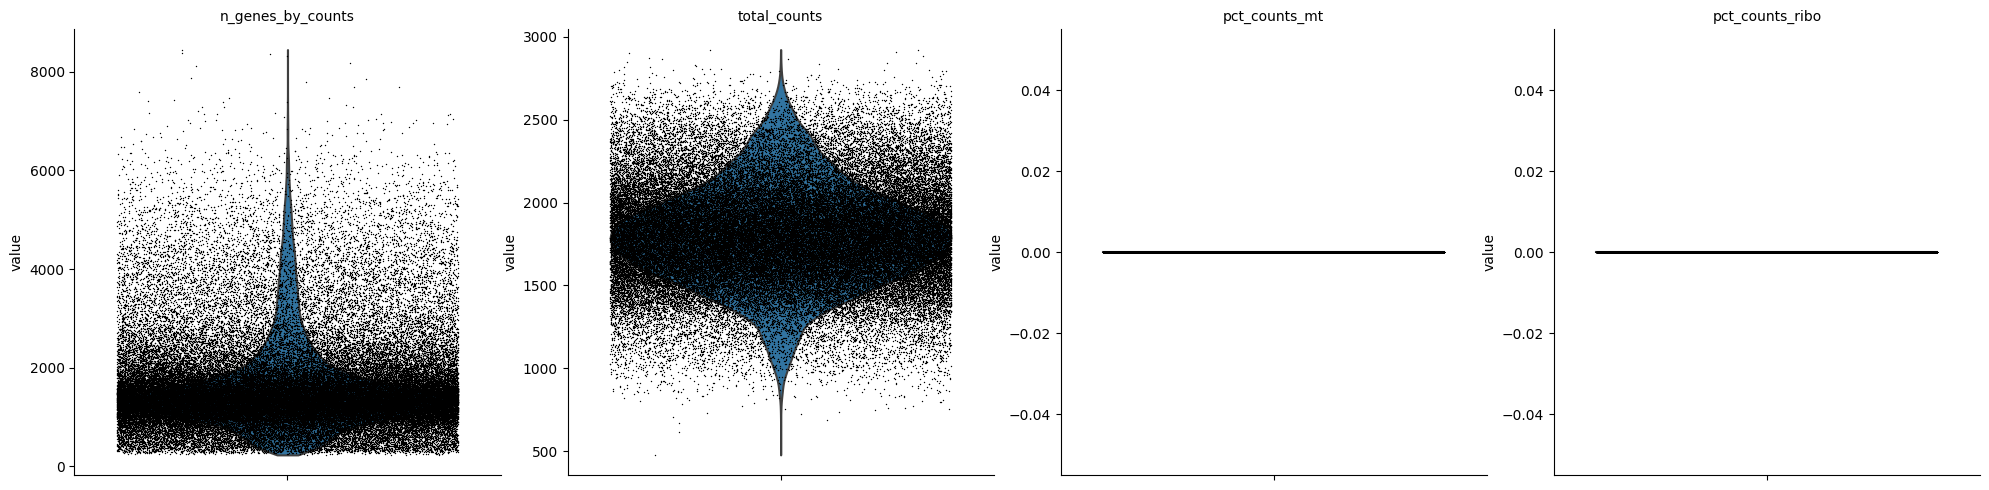

In [69]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo'], 
             jitter=0.4, multi_panel=True)

In [70]:
adata.X.shape

(80446, 24606)

In [71]:
import numpy as np

In [72]:
upper_lim = np.quantile(adata.obs.n_genes_by_counts.values, .98)
#upper_lim = 3000

In [73]:
upper_lim

4769.0

In [74]:
adata = adata[adata.obs.n_genes_by_counts <= upper_lim]

In [75]:
adata.X.shape

(78839, 24606)

In [76]:
#adata = adata[adata.obs.pct_counts_mt < 20]

In [77]:
#adata = adata[adata.obs.pct_counts_ribo < 2]

In [78]:
#adata.X.shape

/Users/zhiyongw/venv/Test/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/zhiyongw/venv/Test/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/zhiyongw/venv/Test/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/zhiyongw/venv/Test/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

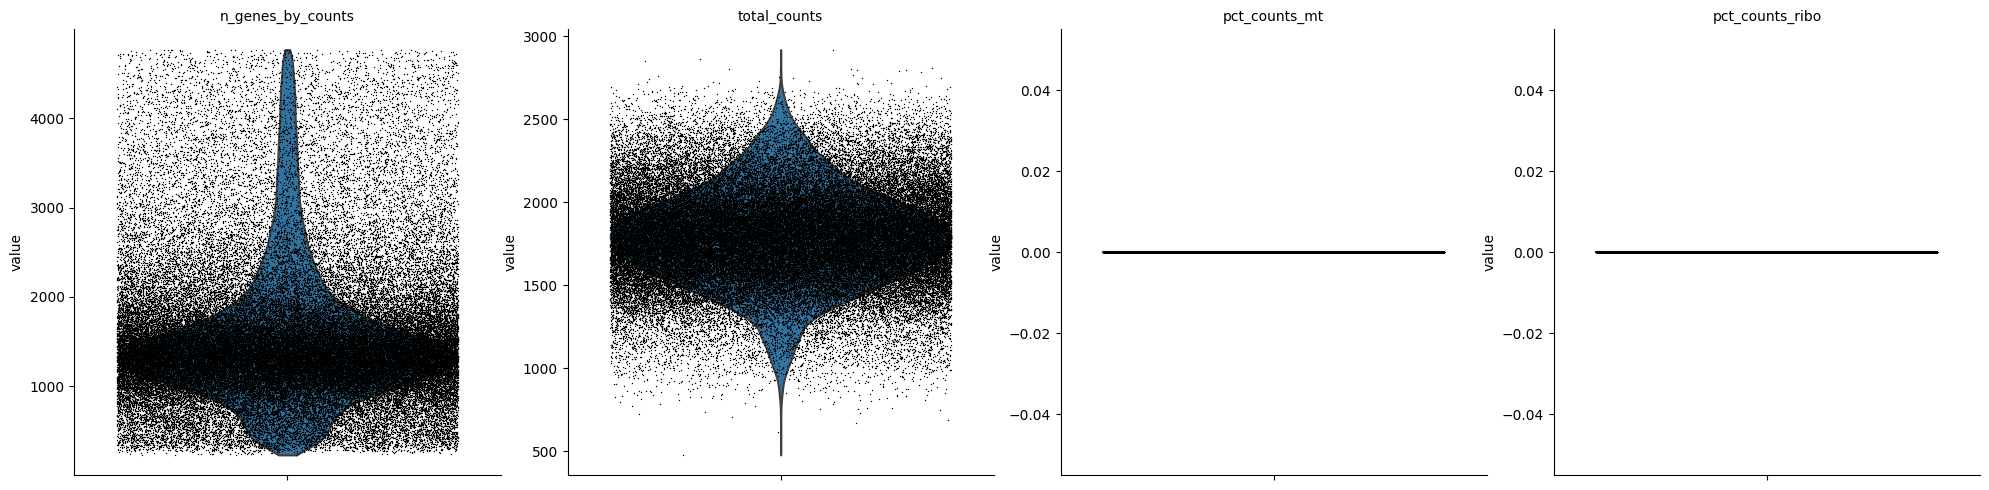

In [79]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo'], 
             jitter=0.4, multi_panel=True)

In [80]:
adata

View of AnnData object with n_obs × n_vars = 78839 × 24606
    obs: 'batch', 'n_counts', 'n_genes', 'percent_mito', 'patient', 'tissue', 'cluster', 'cluster_color', 'TCR_BCR', 'UMAP_x', 'UMAP_y', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'

# Normalization

In [81]:
#adata.X.sum(axis = 1)

In [82]:
#sc.pp.normalize_total(adata, target_sum=1e4) #normalize every cell to 10,000 UMI

In [83]:
#adata.X.sum(axis = 1)

In [84]:
#sc.pp.log1p(adata) #change to log counts

In [85]:
#adata.X.sum(axis = 1)

In [86]:
#adata.raw = adata

# Clustering

In [ ]:
sc.pp.highly_variable_genes(adata, n_top_genes = 1000)

In [ ]:
adata.var

In [ ]:
features = adata.var[ adata.var['highly_variable'] ].index.to_list()

In [ ]:
features[:10]

In [ ]:
sc.pl.highly_variable_genes(adata)

In [ ]:
adata = adata[:, adata.var.highly_variable]

In [ ]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt', 'pct_counts_ribo'])

In [ ]:
sc.pp.scale(adata, max_value=10)

In [ ]:
sc.tl.pca(adata, svd_solver='arpack')

In [ ]:
sc.pl.pca_variance_ratio(adata, log=True, n_pcs = 50)

In [ ]:
sc.pp.neighbors(adata, n_pcs = 30)

In [ ]:
sc.tl.umap(adata)

In [ ]:
sc.pl.umap(adata)

In [ ]:
!pip install leidenalg

In [ ]:
sc.tl.leiden(adata, resolution = 0.5)

In [ ]:
adata.obs

In [ ]:
sc.pl.umap(adata, color=['leiden'])

In [ ]:
adata

In [ ]:
adata.obs['cluster'].unique()

In [ ]:
features[:10]

In [ ]:
features = adata.var.index.to_list()

In [ ]:
features[:10]

In [ ]:
adata.write('processed.h5ad')

# Integration

In [ ]:
def pp(csv_path):
    adata = sc.read_csv(csv_path).T
    sc.pp.filter_genes(adata, min_cells = 10)
    sc.pp.highly_variable_genes(adata, n_top_genes = 2000, subset = True, flavor = 'seurat_v3')
    scvi.model.SCVI.setup_anndata(adata)
    vae = scvi.model.SCVI(adata)
    vae.train()
    solo = scvi.external.SOLO.from_scvi_model(vae)
    solo.train()
    df = solo.predict()
    df['prediction'] = solo.predict(soft = False)
    df.index = df.index.map(lambda x: x[:-2])
    df['dif'] = df.doublet - df.singlet
    doublets = df[(df.prediction == 'doublet') & (df.dif > 1)]
    
    adata = sc.read_csv(csv_path).T
    adata.obs['Sample'] = csv_path.split('_')[2] #'raw_counts/GSM5226574_C51ctr_raw_counts.csv'
    
    adata.obs['doublet'] = adata.obs.index.isin(doublets.index)
    adata = adata[~adata.obs.doublet]
    
    
    sc.pp.filter_cells(adata, min_genes=200) #get rid of cells with fewer than 200 genes
    #sc.pp.filter_genes(adata, min_cells=3) #get rid of genes that are found in fewer than 3 cells
    adata.var['mt'] = adata.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
    adata.var['ribo'] = adata.var_names.isin(ribo_genes[0].values)
    sc.pp.calculate_qc_metrics(adata, qc_vars=['mt', 'ribo'], percent_top=None, log1p=False, inplace=True)
    upper_lim = np.quantile(adata.obs.n_genes_by_counts.values, .98)
    adata = adata[adata.obs.n_genes_by_counts < upper_lim]
    adata = adata[adata.obs.pct_counts_mt < 20]
    adata = adata[adata.obs.pct_counts_ribo < 2]

    return adata

In [ ]:
import os

In [ ]:
out = []
for file in os.listdir('raw_counts/'):
    out.append(pp('raw_counts/' + file))

In [ ]:
adata = sc.concat(out)

In [ ]:
adata

In [ ]:
sc.pp.filter_genes(adata, min_cells = 10)

In [ ]:
adata.X

In [ ]:
from scipy.sparse import csr_matrix

In [ ]:
adata.X = csr_matrix(adata.X)

In [ ]:
adata.X

In [ ]:
adata.write_h5ad('combined.h5ad')

In [ ]:
########################################################

In [ ]:
import scanpy as sc
import scvi
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
adata = sc.read_h5ad('combined.h5ad')
adata

In [ ]:
adata.obs.groupby('Sample').count()

In [ ]:
sc.pp.filter_genes(adata, min_cells = 100)

In [ ]:
adata

In [ ]:
adata.layers['counts'] = adata.X.copy()

In [ ]:
sc.pp.normalize_total(adata, target_sum = 1e4)
sc.pp.log1p(adata)
adata.raw = adata

In [ ]:
adata.obs.head()

In [ ]:
adata

In [ ]:
# sc.pp.highly_variable_genes(adata, n_top_genes=3000, subset = True, layer = 'counts',
#                            flavor = "seurat_v3", batch_key="Sample") #no batch_key if one sample

In [ ]:
scvi.model.SCVI.setup_anndata(adata, layer = "counts",
                             categorical_covariate_keys=["Sample"],
                             continuous_covariate_keys=['pct_counts_mt', 'total_counts', 'pct_counts_ribo'])

In [ ]:
model = scvi.model.SCVI(adata)

In [ ]:
model.train() #may take a while without GPU

In [ ]:
adata.obsm['X_scVI'] = model.get_latent_representation()

In [ ]:
adata.layers['scvi_normalized'] = model.get_normalized_expression(library_size = 1e4)

In [ ]:
sc.pp.neighbors(adata, use_rep = 'X_scVI')

In [ ]:
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution = 0.5)

In [ ]:
sc.pl.umap(adata, color = ['leiden', 'Sample'], frameon = False)

In [ ]:
adata.write_h5ad('integrated.h5ad')

# Find markers/ label cell types

In [ ]:
sc.tl.leiden(adata, resolution = 1)

In [ ]:
sc.tl.rank_genes_groups(adata, 'leiden')

In [ ]:
#sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)

In [ ]:
markers = sc.get.rank_genes_groups_df(adata, None)
markers = markers[(markers.pvals_adj < 0.05) & (markers.logfoldchanges > .5)]
markers

In [ ]:
markers_scvi = model.differential_expression(groupby = 'leiden')
markers_scvi

In [ ]:
markers_scvi = markers_scvi[(markers_scvi['is_de_fdr_0.05']) & (markers_scvi.lfc_mean > .5)]
markers_scvi

In [ ]:
sc.pl.umap(adata, color = ['leiden'], frameon = False, legend_loc = "on data")

In [ ]:
sc.pl.umap(adata, color = ['EPCAM', 'MUC1'], frameon = False, layer = 'scvi_normalized', vmax = 5)
#, layer = 'scvi_normalized'

In [ ]:
cell_type = {"0":"Macrophage",
"1":"Fibroblast",
"2":"CD4+ T-cell",
"3":"AT2",
"4":"AT1",
"5":"CD8+ T-cell",
"6":"Endothelial cell",
"7":"Plasma cell",
"8":"Macrophage",
"9":"AT2",
"10":"Fibroblast",
"11":"Fibroblast",
"12":"Macrophage",
"13":"Macrophage",
"14":"Airway epithelial",
"15":"Airway epithelial",
"16":"Monocyte",
"17":"Airway epithelial",
"18":"B-cell",
"19":"Aerocyte",
"20":"Airway epithelial",
"21":"Smooth muscle cell",
"22":"Cycling T/NK",
"23":"Neuronal cell",
"24":"Denditic cell",
"25":"Pericyte",
"26":"Fibroblast",
"27":"Erythroid-like",
"28":"Macrophage"
}


In [ ]:
adata.obs['cell type'] = adata.obs.leiden.map(cell_type)

In [ ]:
sc.pl.umap(adata, color = ['cell type'], frameon = False)

In [ ]:
adata

In [ ]:
adata.uns['scvi_markers'] = markers_scvi
adata.uns['markers'] = markers

In [ ]:
adata.write_h5ad('integrated.h5ad')

In [ ]:
model.save('model.model')

# Analysis

In [ ]:
import scanpy as sc
import scvi
import seaborn as sns
import numpy as np
import pandas as pd

## Counting cells

In [ ]:
adata = sc.read_h5ad('integrated.h5ad')

In [ ]:
adata.obs.Sample.unique().tolist()

In [ ]:
def map_condition(x):
    if 'cov' in x:
        return 'COVID19'
    else:
        return 'control'

In [ ]:
adata.obs['condition'] = adata.obs.Sample.map(map_condition)
adata.obs

In [ ]:
num_tot_cells = adata.obs.groupby(['Sample']).count()
num_tot_cells = dict(zip(num_tot_cells.index, num_tot_cells.doublet))
num_tot_cells

In [ ]:
cell_type_counts = adata.obs.groupby(['Sample', 'condition', 'cell type']).count()
cell_type_counts = cell_type_counts[cell_type_counts.sum(axis = 1) > 0].reset_index()
cell_type_counts = cell_type_counts[cell_type_counts.columns[0:4]]
cell_type_counts

In [ ]:
cell_type_counts['total_cells'] = cell_type_counts.Sample.map(num_tot_cells).astype(int)

cell_type_counts['frequency'] = cell_type_counts.doublet / cell_type_counts.total_cells

cell_type_counts

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,4))

ax = sns.boxplot(data = cell_type_counts, x = 'cell type', y = 'frequency', hue = 'condition')

plt.xticks(rotation = 35, rotation_mode = 'anchor', ha = 'right')

plt.show()


## DE

In [ ]:
subset = adata[adata.obs['cell type'].isin(['AT1', 'AT2'])].copy()

In [ ]:
#two options: SCVI or diffxpy

In [ ]:
import diffxpy.api as de

In [ ]:
subset.X = subset.X.toarray()

In [ ]:
len(subset.var)

In [ ]:
subset

In [ ]:
sc.pp.filter_genes(subset, min_cells=100)

In [ ]:
len(subset.var)

In [ ]:
subset.obs = subset.obs.rename(columns = {'cell type':'cell_type'})

In [ ]:
#subset = subset.raw.to_adata() #need to run this if you scaled/regress your data and have negative numbers


In [ ]:
subset.obs

In [ ]:
#if want to test between covid/non covid
# res = de.test.wald(data=subset,
#              formula_loc= '~ 1 + condition',
#              factor_loc_totest='condition'
#                   )


res = de.test.wald(data=subset,
             formula_loc= '~ 1 + cell_type',
             factor_loc_totest='cell_type'
                  )

In [ ]:
dedf = res.summary().sort_values('log2fc', ascending = False).reset_index(drop = True)
dedf

In [ ]:
subset.obs.cell_type.unique()

In [ ]:
most_up = dedf.iloc[0].gene
i = np.where(subset.var_names == most_up)[0][0]

a = subset[subset.obs.cell_type == 'AT1'].X[:, i]
b = subset[subset.obs.cell_type == 'AT2'].X[:, i]
print(f"{most_up} expression:")
print(f"AT1: {a.mean()}")
print(f"AT2: {b.mean()}")


In [ ]:
dedf['log2fc'] = dedf['log2fc']*-1
dedf = dedf.sort_values('log2fc', ascending = False).reset_index(drop = True)
dedf

In [ ]:
dedf = dedf[(dedf.qval < 0.05) & (abs(dedf.log2fc) > .5)]
dedf

In [ ]:
dedf = dedf[dedf['mean'] > 0.15]
dedf

In [ ]:
genes_to_show = dedf[-25:].gene.tolist() + dedf[:25].gene.tolist() #top 25 and bottom 25 from sorted df

In [ ]:
sc.pl.heatmap(subset, genes_to_show, groupby='cell_type', swap_axes=True)

In [ ]:
#DE with scvi

In [ ]:
model  = scvi.model.SCVI.load('model.model', adata)

In [ ]:
model

In [ ]:
scvi_de = model.differential_expression(
    idx1 = [adata.obs['cell type'] == 'AT1'],
    idx2 = [adata.obs['cell type'] == 'AT2']
    )

#any set of cells vs any set of cells
# scvi_de = model.differential_expression(
#     idx1 = [(adata.obs['cell type'].isin(['AT1', 'AT2'])) & (adata.obs.condition == 'COVID19')],
#     idx2 = [(adata.obs['cell type'].isin(['AT1', 'AT2'])) & (adata.obs.condition == 'control')]
#     )

In [ ]:
scvi_de

In [ ]:
scvi_de = scvi_de[(scvi_de['is_de_fdr_0.05']) & (abs(scvi_de.lfc_mean) > .5)]
scvi_de = scvi_de.sort_values('lfc_mean')
scvi_de

In [ ]:
scvi_de = scvi_de[(scvi_de.raw_normalized_mean1 > .5) | (scvi_de.raw_normalized_mean2 > .5)]
scvi_de

In [ ]:
genes_to_show = scvi_de[-25:].index.tolist() + scvi_de[:25].index.tolist() #top 25 and bottom 25 from sorted df


In [ ]:

sc.pl.heatmap(subset, genes_to_show, groupby='cell_type', swap_axes=True, layer = 'scvi_normalized',
              log = True)

# GO enrichment

In [ ]:
import gseapy as gp #this method requires internet connection

In [ ]:
gp.get_library_name()
# 'GO_Biological_Process_2021',
#'KEGG_2021_Human',

In [ ]:
subset

In [ ]:
enr = gp.enrichr(gene_list= dedf[dedf.log2fc > 0].gene.tolist(),
                 gene_sets=['KEGG_2021_Human','GO_Biological_Process_2021'],
                 organism='human', # don't forget to set organism to the one you desired!
                 outdir=None, # don't write to disk,
                 background = subset.var_names.tolist()
                )

In [ ]:
enr.results

## comparisons

In [ ]:
sc.pl.violin(subset[subset.obs.cell_type == 'AT2'], 'ETV5', groupby='condition')

In [ ]:
from scipy import stats

In [ ]:
temp = subset[subset.obs.cell_type == 'AT2']

i = np.where(temp.var_names == 'ETV5')[0][0]

In [ ]:
a = temp[temp.obs.condition == 'COVID19'].X[:,i]
b = temp[temp.obs.condition == 'control'].X[:,i]

In [ ]:
stats.mannwhitneyu(a, b)

## Score gene signature

In [ ]:
#gene signature, ie, input list of genes from user
with open('datp_sig.txt') as f:
    datp_sig = [x.strip() for x in list(f)]


In [ ]:
sc.tl.score_genes(subset, datp_sig, score_name = 'datp')

In [ ]:
subset.obs

In [ ]:
sc.pl.violin(subset, 'datp', groupby='condition')

In [ ]:
a = subset[subset.obs.condition == 'COVID19'].obs.datp.values
b = subset[subset.obs.condition == 'control'].obs.datp.values
stats.mannwhitneyu(a, b)

In [ ]:
sc.pl.umap(subset, color = 'datp', vmax = 1)

In [ ]:
#for thumbnail

In [ ]:
from matplotlib.pyplot import rc_context


In [ ]:
adata

In [ ]:
with rc_context({'figure.figsize': (8,8)}):
    sc.pl.umap(adata, color = ['cell type'], frameon = False, s = 5, legend_loc = 'on data',
              legend_fontsize=12, legend_fontoutline=2)

In [ ]:
with rc_context({'figure.figsize': (8,8)}):
    sc.pl.umap(adata, color = ['MUC1'], frameon = False, layer = 'scvi_normalized', vmax = 5, s = 5)